# Introduction to Plotly
The aim of this workshop is to intoduce two common libraries in Python:

*   **[Matplotlib](https://matplotlib.org/stable/index.html)**: For simple visualisation
*   **[Plotly](https://plotly.com/)**: For interactive visualisation



## Data Formatting
The first step is to import the data and format them so that they can be used to produce different visualisations

In [164]:
# We need to import to import some external libraries that will  be used to transform the data
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
!python -m pip install plotly --upgrade

Today we will work with covid data from the confederation [website](https://www.covid19.admin.ch/en/overview)
We first download the data and unzip them into a folder called covid_data.

NB we can run command by preceeding them with ! as done below with the wget command and unzip.

In [165]:
!rm -r /content/*
!wget https://www.covid19.admin.ch/api/data/20211025-yqqxa0ri/downloads/sources-csv.zip -O data_zipped.zip
!unzip -qd /content/covid_data /content/data_zipped.zip

--2021-10-26 12:13:25--  https://www.covid19.admin.ch/api/data/20211025-yqqxa0ri/downloads/sources-csv.zip
Resolving www.covid19.admin.ch (www.covid19.admin.ch)... 52.84.158.9, 52.84.158.16, 52.84.158.2, ...
Connecting to www.covid19.admin.ch (www.covid19.admin.ch)|52.84.158.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22194677 (21M) [application/zip]
Saving to: ‘data_zipped.zip’

data_zipped.zip     100%[===================>]  21.17M  --.-KB/s    in 0.1s    

2021-10-26 12:13:25 (154 MB/s) - ‘data_zipped.zip’ saved [22194677/22194677]



In [166]:
# we can now look at the data we have downloaded
path_data = '/content/covid_data/data'
os.listdir(path_data)

['COVID19VaccPersons_AKL10_w_v2.csv',
 'COVID19Cases_extraGeoRegions_14d.csv',
 'COVID19IntQua.csv',
 'COVID19Hosp_geoRegion_sex_w.csv',
 'COVID19Death_geoRegion_w.csv',
 'COVID19Test_geoRegion_sex_w.csv',
 'COVID19Cases_geoRegion_sex_w.csv',
 'COVID19Variants_wgs.csv',
 'COVID19Hosp_vaccpersons_AKL10_w.csv',
 'COVID19EvalTextDaily.csv',
 'COVID19Cases_vaccpersons_AKL10_w.csv',
 'COVID19Hosp_vaccpersons.csv',
 'COVID19VaccPersons_vaccine.csv',
 'COVID19FullyVaccPersons_indication_w_v2.csv',
 'COVID19Re_geoRegion.csv',
 'COVID19VaccPersons_v2.csv',
 'COVID19Cases_geoRegion_w.csv',
 'COVID19Death_vaccpersons.csv',
 'COVID19VaccDosesAdministered_location_w.csv',
 'COVID19VaccDosesAdministered_AKL10_w.csv',
 'COVID19VaccDosesAdministered_indication_w.csv',
 'COVID19AdministeredDoses_vaccine.csv',
 'COVID19Test_geoRegion_PCR_Antigen.csv',
 'COVID19Hosp_geoRegion.csv',
 'COVID19Test_geoRegion_w.csv',
 'COVID19VaccDosesAdministered_sex_w.csv',
 'COVID19Test_geoRegion_PCR_Antigen_w.csv',
 'COV

In [167]:
#We can read the csv file with the pandas library we imported before
df_hosp = pd.read_csv(os.path.join(path_data, 'COVID19Hosp_geoRegion_AKL10_w.csv'))
# We convert the week number into dates so that they are easier to manipulate afterwards
df_hosp.datum = pd.to_datetime(df_hosp.datum.astype(str)+'1',format="%Y%W%w")


Data is split in canton and [region](https://en.wikipedia.org/wiki/NUTS_statistical_regions_of_Switzerland) 

We first focus on the data for all Switzerland

In [168]:
# df_hospCH = df_hosp.loc[df_hosp.geoRegion == 'CH',:]
print(df_hosp.columns)

Index(['altersklasse_covid19', 'geoRegion', 'datum', 'entries',
       'timeframe_all', 'timeframe_phase2', 'timeframe_phase2b',
       'timeframe_phase3', 'timeframe_phase4', 'timeframe_vacc_info',
       'timeframe_28d', 'timeframe_14d', 'sumTotal', 'offset_vacc_info',
       'sumTotal_vacc_info', 'freq', 'prct', 'pop', 'inz_entries',
       'inzsumTotal', 'type', 'type_variant', 'version', 'datum_unit',
       'datum_dboardformated', 'entries_diff_abs', 'entries_diff_inz',
       'entries_diff_pct', 'prct_diff'],
      dtype='object')


In [169]:
df_hospIndexed = df_hosp.set_index(['geoRegion','altersklasse_covid19', 'datum']).loc[:,['entries','inz_entries']]

In [170]:
df_hospCH = df_hospIndexed.xs('CH')
df_hospCH

,,entries,inz_entries
altersklasse_covid19,datum,,
0 - 9,2020-03-02,2,0.23
10 - 19,2020-03-02,0,0.00
20 - 29,2020-03-02,6,0.58
30 - 39,2020-03-02,8,0.64
40 - 49,2020-03-02,3,0.25
...,...,...,...
50 - 59,2021-10-18,10,0.77
60 - 69,2021-10-18,20,2.07
70 - 79,2021-10-18,14,1.90


## Simple visualisations: Matplotlib

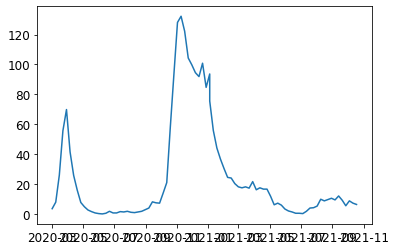

In [171]:
df_entries = df_hospCH.xs('80+').loc[:,'inz_entries']
plt.plot(df_entries);

### Customising Matplolib graphs

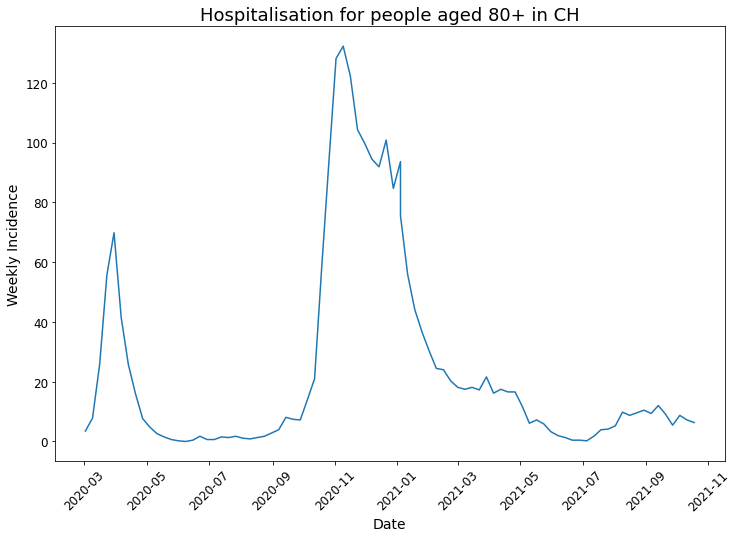

In [172]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.figure(figsize=[12,8]);
plt.plot(df_entries);
plt.title('Hospitalisation for people aged 80+ in CH',fontsize = 18);
plt.ylabel('Weekly Incidence');
plt.xlabel('Date');
plt.xticks(rotation=45);

##Interactive visualisations Plotly

You can find some of the projects done with dash and plotly [here](https://dash.gallery/Portal/)

In [173]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_entries.index, y=df_entries.values,
    name='Incdence',
    mode='lines+markers',
))

fig.update_layout(
        template='plotly_white')

In [174]:
import plotly.express as px

color_scheme = px.colors.qualitative.Vivid
age_classes = df_hospCH.index.get_level_values(0).unique()
# print('Age classses:',age_classes.tolist())
fig = go.Figure()
for idx,age_range in enumerate(age_classes):
  if age_range == 'Unbekannt':
    legend_name = 'Unknown'
  else:
    legend_name = age_range 
  df_tmp = df_hospCH.xs(age_range).loc[:,'inz_entries']
  fig.add_trace(go.Scatter(
    x=df_tmp.index, y=df_tmp.values,
    name=legend_name,
    mode='lines+markers',
    marker_color = color_scheme[idx]
  ))

fig.update_layout(
    title="Incidence of hospitalisation in CH",
    xaxis_title="Date",
    yaxis_title="Incidence",
    template='plotly_white')

# fig.update_layout(legend_title_text='Age groups')
    

In [175]:
import plotly.express as px

color_scheme = px.colors.qualitative.Vivid
locations = df_hospIndexed.index.get_level_values(0).unique()
fig = go.Figure()
# We first add the trace for all locations and age classes setting visible to false
for location in locations:
  df_loc = df_hospIndexed.xs(location)
  for idx,age_range in enumerate(age_classes):
    if age_range == 'Unbekannt':
      legend_name = 'Unknown'
    else:
      legend_name = age_range 
      
    df_tmp = df_loc.xs(age_range).loc[:,'inz_entries']
    fig.add_trace(go.Scatter(
      x=df_tmp.index, y=df_tmp.values,
      name=legend_name,
      mode='lines+markers',
      visible=False,
      marker_color = color_scheme[idx]
    ))

steps = []
trace_nb = int(len(fig.data)/len(locations))
# We create the dict with info of which trace to show for each locations
for i in range(len(locations)):

		area_str = locations[i]
		step = dict(
			label=area_str,
			method="update",
			args=[{"visible": [False] * len(fig.data)},
				# {"title": area_str}
        ],  # layout attribute
		)
		for idx in range(trace_nb):	# Toggle i'th trace to "visible"
			step["args"][0]["visible"][i*trace_nb+idx] = True  
		steps.append(step)

# We update the layout with the dictionary previously created for the button
fig.update_layout(
		template='plotly_white',
    width=1500,
    height=700,
    xaxis_title="Date",
    yaxis_title="Incidence",
		updatemenus=[ 
			dict(
				active=0,
				buttons=steps,
				direction="down",
				pad={"r": 10, "t": 10,"b":15},
				showactive=True,
				x=0,
				xanchor="left",
				yanchor="bottom")],
	)

for idx in range(trace_nb):
		fig.data[idx].visible = True

fig.show()

## Your turn
You can pick one of the csv included in the dataset we downloaded and create your own graph. e.g. show vaccinated population per canton